In [1]:
from transformers import pipeline
from nltk.tokenize import sent_tokenize
import nltk
import torch

c:\Users\anubh\AppData\Local\Programs\Python\Python313\Scripts\Learning\TV Series Analysis System\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
os.environ["TRANSFORMERS_NO_TF"] = "1"

In [3]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

###LOAD MODEL

In [4]:
model_name="facebook/bart-large-mnli"
device=0 if torch.cuda.is_available() else -1

In [5]:
def load_model (device):
          theme_classifier=pipeline("zero-shot-classification",model=model_name,device=device)
          return theme_classifier

In [6]:
theme_classifier=load_model(device)

Device set to use cpu


In [7]:
theme_list = ["friendship","hope","sacrifice","battle","self development","betrayal","love","dialogue"]

In [8]:
theme_classifier(
    "I gave him a right hook then a left jab",
    theme_list,
    multi_label=True
)

{'sequence': 'I gave him a right hook then a left jab',
 'labels': ['battle',
  'self development',
  'hope',
  'sacrifice',
  'dialogue',
  'betrayal',
  'love',
  'friendship'],
 'scores': [0.9121251106262207,
  0.47499901056289673,
  0.08781763166189194,
  0.04500018432736397,
  0.020132696256041527,
  0.012040354311466217,
  0.00429227389395237,
  0.002817214000970125]}

##LOAD DATASET

In [9]:
from glob import glob

In [10]:
files = glob('../data/Subtitles/*.ass')

In [11]:
files[:5]

['../data/Subtitles\\Naruto Season 1 - 01.ass',
 '../data/Subtitles\\Naruto Season 1 - 02.ass',
 '../data/Subtitles\\Naruto Season 1 - 03.ass',
 '../data/Subtitles\\Naruto Season 1 - 04.ass',
 '../data/Subtitles\\Naruto Season 1 - 05.ass']

In [12]:
with open(files[0],'r') as file:
    lines = file.readlines()
    lines = lines[27:]
    lines =  [ ",".join(line.split(',')[9:])  for line in lines ]

In [13]:
lines[:2]

['A long time ago, a powerful demon fox\\Nappeared with nine tails.\n',
 'With its powerful tails,\n']

In [14]:
lines = [ line.replace('\\N',' ') for line in lines]

In [15]:
lines[:2]

['A long time ago, a powerful demon fox appeared with nine tails.\n',
 'With its powerful tails,\n']

In [16]:
" ".join(lines[:10])

"A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can't let it get any closer to our village!\n One great Ninja was able to imprison the monster,\n but died in the process.\n This Ninja was known asâ€¦ the Fourth Hokage.\n Naruto!\n"

In [17]:
int(files[0].split('-')[-1].split('.')[0].strip())

1

In [18]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd

In [20]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import numpy as np

In [29]:
# Add local nltk_data path (you can customize this)
nltk_data_path = os.path.join(os.getcwd(), 'nltk_data')
nltk.data.path.append(nltk_data_path)

# Ensure punkt is downloaded to that path
nltk.download('punkt', download_dir=nltk_data_path)

[nltk_data] Downloading package punkt to c:\Users\anubh\AppData\Local\
[nltk_data]     Programs\Python\Python313\Scripts\Learning\TV Series
[nltk_data]     Analysis System\env\theme_classifier\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [30]:
def load_subtitles_dataset(dataset_path):
    subtitles_paths = glob(os.path.join(dataset_path, '*.ass'))

    scripts = []
    episode_nums = []

    for path in subtitles_paths:
        with open(path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        # Skip header and extract dialogue
        content_lines = lines[27:]  # Assuming subtitle data starts at line 28
        dialogues = [",".join(line.split(',')[9:]).replace('\\N', ' ').strip() for line in content_lines]
        script = " ".join(dialogues)

        # Extract episode number from file name
        try:
            episode = int(os.path.basename(path).split('-')[-1].split('.')[0].strip())
        except Exception as e:
            print(f"Failed to parse episode number from {path}: {e}")
            continue

        scripts.append(script)
        episode_nums.append(episode)

    df = pd.DataFrame({
        "episode": episode_nums,
        "script": scripts
    }).sort_values("episode").reset_index(drop=True)

    return df

In [31]:
dataset_path = "../data/Subtitles"
df = load_subtitles_dataset(dataset_path)

In [32]:
df.head()


,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon! Running like a fugitive, Being chased b..."
2,3,"C'mon! Running like a fugitive, Being chased b..."
3,4,"C'mon! Running like a fugitive, Being chased b..."
4,5,"C'mon! Running like a fugitive, Being chased b..."


## Run MODEL

In [33]:
script = df.iloc[0]['script']

In [34]:
script

'A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails, it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can\'t let it get any closer to our village! One great Ninja was able to imprison the monster, but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You\'re really gonna get it this time! I don\'t care! You know your problem? You can\'t do the things I do! Only I can do this! I\'m better than all of you! Believe it! There\'s a problem, sir! Lord Hokage! What is it? Did that Naruto do something again? Yes. He climbed onto the Mountainside Images… And he vandalized and graffitied all over them! Wait! Ha ha… Why should I? Hey, Naruto! How did you suddenly get here, lruka Sensei? The question is what are you doing here when you should be in class now? Now listen, Naruto. You failed the last

In [37]:
from nltk.tokenize import sent_tokenize

In [40]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       tagge

True

In [41]:
script_sentences = sent_tokenize(script)
script_sentences[:3]

['A long time ago, a powerful demon fox appeared with nine tails.',
 'With its powerful tails, it could smash mountains and create tidal waves.',
 'A band of Ninjas rose to defend their village from attack.']

In [42]:
# Batch Sentence
sentence_batch_size=20
script_batches = []
for index in range(0,len(script_sentences),sentence_batch_size):
    sent = " ".join(script_sentences[index:index+sentence_batch_size])
    script_batches.append(sent)

In [43]:
script_batches[:2]

["A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails, it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster, but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
 'Yes. He climbed onto the Mountainside Images… And he vandalized and graffitied all over them! Wait! Ha ha… Why should I? Hey, Naruto! How did you suddenly get here, lruka Sensei? The question is what are you doing here when you should be in class now? Now listen, Naruto. You failed the last 

In [44]:
theme_output = theme_classifier(
    script_batches[:2],
    theme_list,
    multi_label=True
)

In [45]:
theme_output

[{'sequence': "A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails, it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster, but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
  'labels': ['dialogue',
   'betrayal',
   'battle',
   'sacrifice',
   'self development',
   'hope',
   'friendship',
   'love'],
  'scores': [0.9790681004524231,
   0.94975346326828,
   0.8569772839546204,
   0.7666401267051697,
   0.7487459778785706,
   0.1931648999452591,
   

In [46]:
themes = {}
for output in theme_output:
    for label,score in zip(output['labels'],output['scores']):
        if label not in themes:
            themes[label] = []
        themes[label].append(score)

In [47]:
themes = {key: np.mean(np.array(value)) for key,value in themes.items()}

In [48]:
themes

{'dialogue': np.float64(0.947153627872467),
 'betrayal': np.float64(0.8211140334606171),
 'battle': np.float64(0.7519008219242096),
 'sacrifice': np.float64(0.6776048243045807),
 'self development': np.float64(0.7973166704177856),
 'hope': np.float64(0.16462717205286026),
 'friendship': np.float64(0.061932606622576714),
 'love': np.float64(0.03086490649729967)}

In [49]:
def get_themes_inference(script):
    script_sentences = sent_tokenize(script)

    # Batch Sentence
    sentence_batch_size=20
    script_batches = []
    for index in range(0,len(script_sentences),sentence_batch_size):
        sent = " ".join(script_sentences[index:index+sentence_batch_size])
        script_batches.append(sent)
    
    # Run Model
    theme_output = theme_classifier(
        script_batches[:2],
        theme_list,
        multi_label=True
    )

    # Wrangle Output 
    themes = {}
    for output in theme_output:
        for label,score in zip(output['labels'],output['scores']):
            if label not in themes:
                themes[label] = []
            themes[label].append(score)

    themes = {key: np.mean(np.array(value)) for key,value in themes.items()}

    return themes

In [50]:
df = df.head(2)

In [51]:
df

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon! Running like a fugitive, Being chased b..."


In [52]:
output_themes = df['script'].apply(get_themes_inference)

In [53]:
output_themes

0    {'dialogue': 0.947153627872467, 'betrayal': 0....
1    {'dialogue': 0.8331482112407684, 'love': 0.231...
Name: script, dtype: object

In [54]:
theme_df = pd.DataFrame(output_themes.tolist())

In [55]:
theme_df

,dialogue,betrayal,battle,sacrifice,self development,hope,friendship,love
0,0.947154,0.821114,0.751901,0.677605,0.797317,0.164627,0.061933,0.030865
1,0.833148,0.385404,0.523822,0.364377,0.356159,0.174276,0.028539,0.231183


In [56]:
df[theme_df.columns] = theme_df
df

,episode,script,dialogue,betrayal,battle,sacrifice,self development,hope,friendship,love
0,1,"A long time ago, a powerful demon fox appeared...",0.947154,0.821114,0.751901,0.677605,0.797317,0.164627,0.061933,0.030865
1,2,"C'mon! Running like a fugitive, Being chased b...",0.833148,0.385404,0.523822,0.364377,0.356159,0.174276,0.028539,0.231183


In [57]:
df = df.drop('dialogue',axis=1)

In [58]:
theme_output = df.drop(['episode','script'],axis=1).sum().reset_index()
theme_output.columns = ['theme','score']
theme_output

,theme,score
0,betrayal,1.206518
1,battle,1.275723
2,sacrifice,1.041982
3,self development,1.153476
4,hope,0.338904
5,friendship,0.090472
6,love,0.262048


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

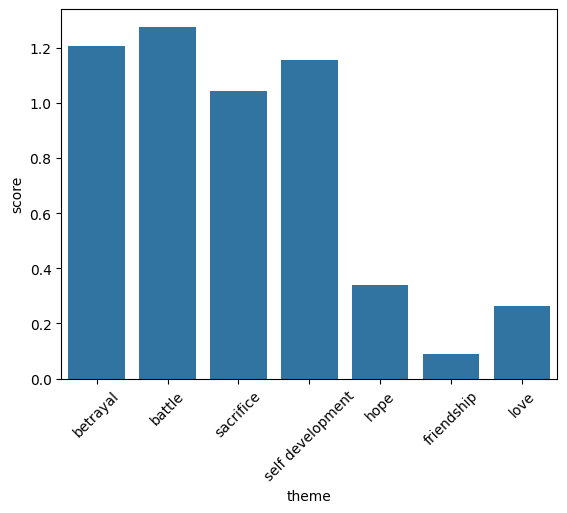

In [61]:
sns.barplot(data = theme_output ,x="theme",y="score" )
plt.xticks(rotation=45)
plt.show()